In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
customers = pd.read_csv("Ecommerce Customers")

In [3]:
customers.head(2)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# Exploratory Data Analysis

**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

There are several ways to check whether a chart is having correlation or not between two variables. One way is to look at the scatter plot of the data. If the points on the scatter plot are clustered together, then there is a positive correlation between the two variables. If the points are spread out, then there is no correlation between the two variables

 **Second Method**
 
 Look at the correlation coefficient. The correlation coefficient is a number between -1 and 1. A correlation coefficient of 1 indicates a perfect positive correlation, a correlation coefficient of -1 indicates a perfect negative correlation, and a correlation coefficient of 0 indicates no correlation.

Positive correlation means that as one variable increases, the other variable also increases. For example, there is a positive correlation between height and weight. As people get taller, they usually also get heavier.

Negative correlation means that as one variable increases, the other variable decreases. For example, there is a negative correlation between temperature and ice cream sales. As the temperature increases, people usually buy less ice cream.

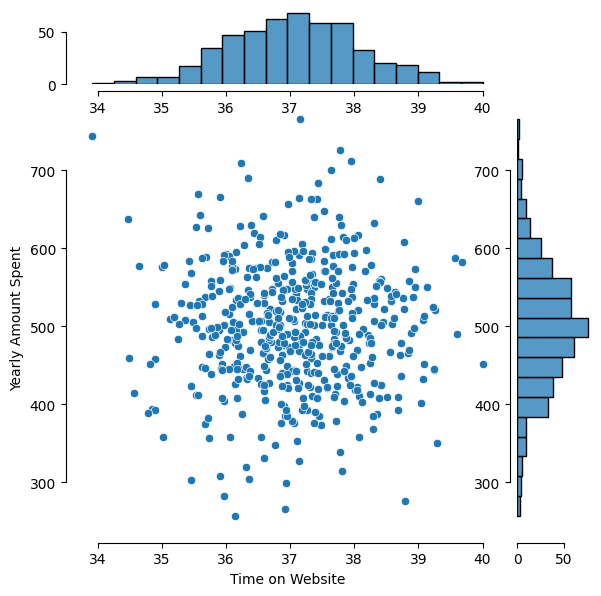

In [6]:
sns.jointplot(x="Time on Website", y="Yearly Amount Spent", data=customers)
sns.despine(offset = 5, trim = True)
plt.show()

**Do the same but with the Time on App column instead.**

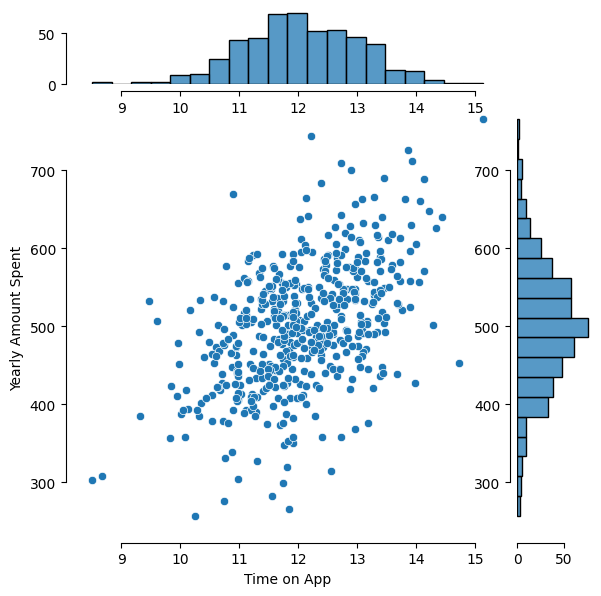

In [7]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=customers)
sns.despine(offset = 5, trim = True)
plt.show()

**Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

In [8]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

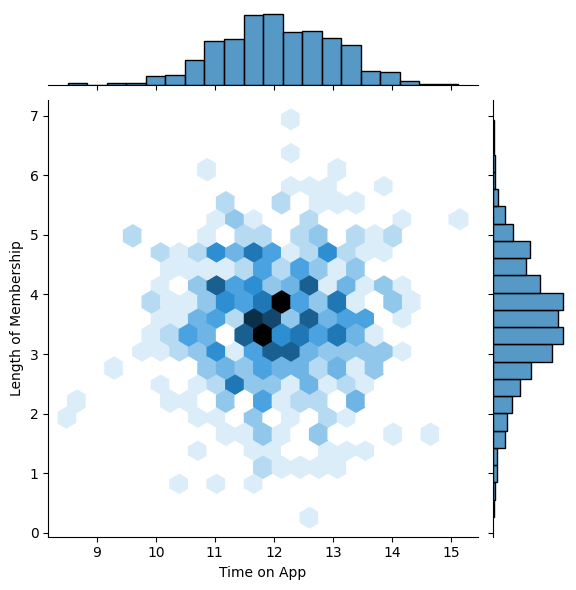

In [9]:
sns.jointplot(x='Time on App', y='Length of Membership', data=customers, kind="hex")

**Let's explore these types of relationships across the entire data set. Use [pairplot] to recreate the plot below.**

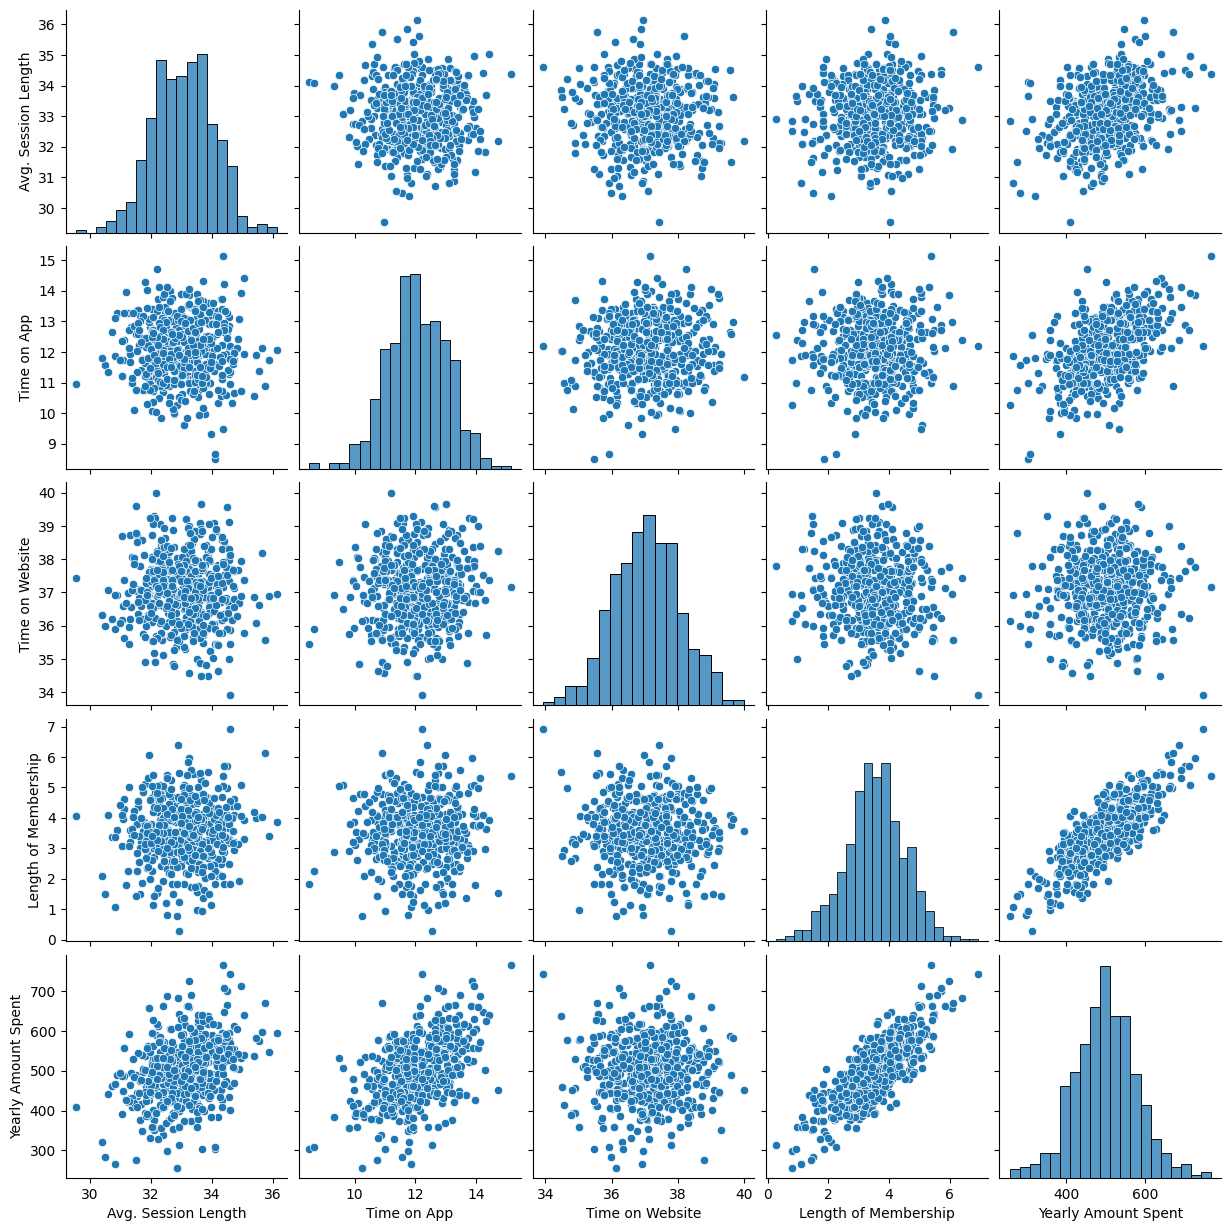

In [10]:
sns.pairplot(customers)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

In [11]:
# Length Of Membership

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership.**

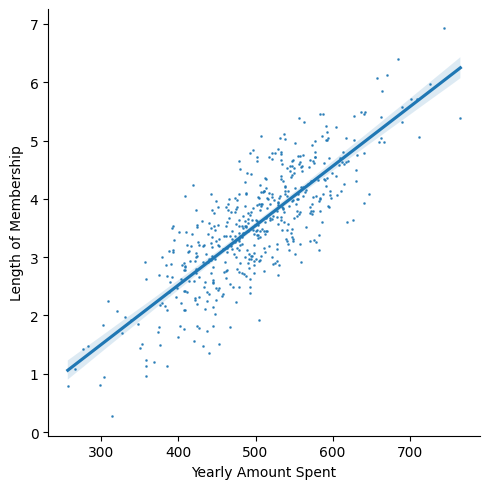

In [12]:
sns.lmplot(x='Yearly Amount Spent', y='Length of Membership', data=customers, scatter_kws={"s": 0.8})

# Training And Testing Data

In [13]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [14]:
X = customers.drop(['Yearly Amount Spent', 'Avatar', 'Address', 'Email'], axis=1)
y = customers['Yearly Amount Spent']

**Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Train The Model

In [16]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

In [17]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [18]:
print(f"Co-effecients of linear model : {linear_model.coef_}") 

Co-effecients of linear model : [25.98154972 38.59015875  0.19040528 61.27909654]


# Predicting Test Data

In [19]:
predicted = linear_model.predict(X_test)

** Create a scatterplot of the real test values versus the predicted values. **

Text(0.5, 1.0, 'Actual vs Predicted values')

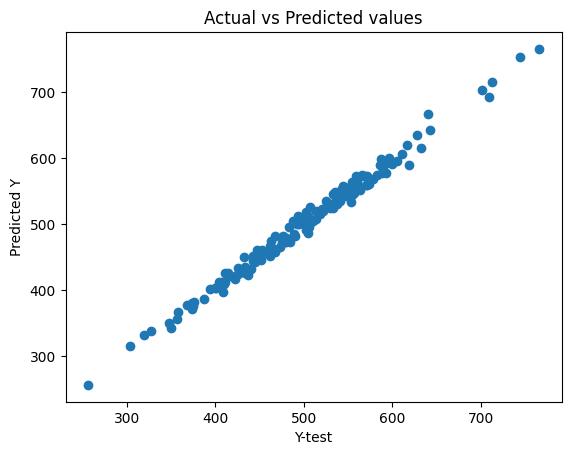

In [20]:
plt.scatter(y_test, predicted)
plt.xlabel("Y-test")
plt.ylabel("Predicted Y")
plt.title("Actual vs Predicted values")

# Evaluating The Model

In [21]:
from sklearn import metrics

In [22]:
print(f'MAE : {metrics.mean_absolute_error(y_test, predicted)}')
print(f'MSE : {metrics.mean_squared_error(y_test, predicted)}')
print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_test, predicted))}')

MAE : 7.228148653430834
MSE : 79.81305165097443
RMSE : 8.933815066978633


# Residuals

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

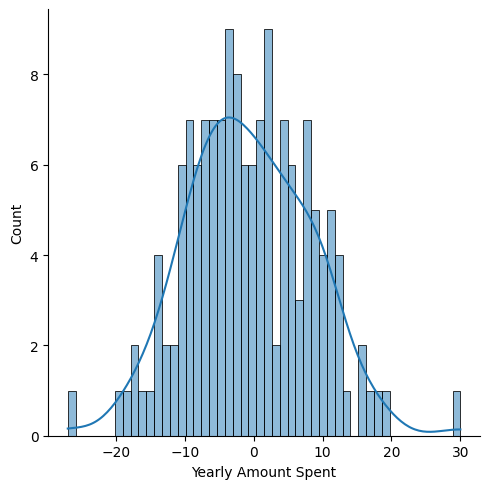

In [23]:
sns.displot( (y_test - predicted), bins=50, kde=True )

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [24]:
lm_coeff = pd.DataFrame(linear_model.coef_, X.columns, columns=["Coeffecients"])

lm_coeff

,Coeffecients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.

**Do you think the company should focus more on their mobile app or on their website?**


This is tricky, there are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!
